# BigMartSales-III

# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# Data

Evaluation Metric:
Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in "SampleSubmission.csv".
We at our end, have the actual sales for the test dataset, against which your predictions will be evaluated. We will use the Root Mean Square Error value to judge your response.


## RoadMap#####

####
Data Summary: Exploration, Viualization, Data Imputation
    
Preprocessing / Feature Engineering: Deriving the column, Transfomation, FEature selection
        
Dividing our data interms of trainig and testing

Building the model:   linear regression, Ensemble regressor methods
    


In [ ]:
To add the cells
ESC +A == add cell above
ESC B= below cell

shift+Enter= Execute




In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

import seaborn as sns


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#Read CSV
data_path = "C:/Users/Jameel shaik/Downloads/Dezyre/HackerDay/Bigmartsales-iii/"
train = pd.read_csv(data_path+'Train_UWu5bXk.csv')
test = pd.read_csv(data_path+'/Test_u94Q5KV.csv')

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
#creates a new column 'source' with values as 'train' for all train data and 'test' for all test data
train['source']='train'
test['source']='test'

data=pd.concat([train,test],ignore_index=True)
print train.shape,test.shape,data.shape

#data.apply(lambda x:sum(x.isnull()))

data.isnull().sum()


(8523, 13) (5681, 12) (14204, 13)


Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [3]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [4]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [5]:
#Filter categorical variables and exclude Item_Identifier etc
categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]== 'object']
categorical_columns=[x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

for col in categorical_columns:
    print "\nFrequency of categories for variable %s"%col
    print data[col].value_counts()


Frequency of categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
dtype: int64

Frequency of categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
dtype: int64

Frequency of categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
dtype: int64

Frequency of categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
dtype: int64

Frequency of categories for variable Outlet_Type
Supermarket Type1    9294
Grocery St

In [6]:
item_avg_wt=data.pivot_table(values='Item_Weight',index='Item_Identifier')
print item_avg_wt

miss_bool=data['Item_Weight'].isnull()
# print "hi", sum(miss_bool)
print miss_bool

data.loc[miss_bool,'Item_Weight']=data.loc[miss_bool,'Item_Identifier'].apply(lambda x : item_avg_wt[x])
print sum(data['Item_Weight'].isnull())


Item_Identifier
DRA12              11.600
DRA24              19.350
DRA59               8.270
DRB01               7.390
DRB13               6.115
DRB24               8.785
DRB25              12.300
DRB48              16.750
DRC01               5.920
DRC12              17.850
DRC13               8.260
DRC24              17.850
DRC25               5.730
DRC27              13.800
DRC36              13.000
...
NCY30              20.250
NCY41              16.750
NCY42               6.380
NCY53              20.000
NCY54               8.430
NCZ05               8.485
NCZ06              19.600
NCZ17              12.150
NCZ18               7.825
NCZ29              15.000
NCZ30               6.590
NCZ41              19.850
NCZ42              10.500
NCZ53               9.600
NCZ54              14.650
Name: Item_Weight, Length: 1559, dtype: float64
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    Fa

In [7]:
visibility_avg=data.pivot_table(values='Item_Visibility',index='Item_Identifier')
miss_bool=(data['Item_Visibility']==0)

print 'Number of zeros initially %d'%sum(miss_bool)
data.loc[miss_bool,'Item_Visibility']=data.loc[miss_bool,"Item_Identifier"].apply(lambda x:visibility_avg[x])
print 'Number of zeros after imputing %d'%sum(data['Item_Visibility']==0)

Number of zeros initially 879
Number of zeros after imputing 0


In [8]:
# determine another feature
data['Item_Visibility_MeanRatio']=data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']],axis=1)
print data['Item_Visibility_MeanRatio'].describe()
print visibility_avg[[0,10]]#[data[1]['Item_Identifier']]

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64
Item_Identifier
DRA12              0.034938
DRC13              0.028408
Name: Item_Visibility, dtype: float64


In [9]:
#capturing initial two characters of string and separating the data 
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[0:2])
#Renaming them to more intuitive categories.
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food',
                                                            'NC':'Non-Consumable',
                                                            'DR':'Drinks'})

data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
dtype: int64

In [10]:
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [11]:
print 'Original Categories :'
print data['Item_Fat_Content'].value_counts()

print '\n Modified Categories :'
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF': 'Low Fat',
                                                          'reg':'Regular',
                                                          'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Original Categories :
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
dtype: int64

 Modified Categories :


Low Fat    9185
Regular    5019
dtype: int64

In [12]:
#Mark non-consumables as separate category in low_fat
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
dtype: int64

In [13]:
#Outlet Identifier is the store number /name so changed it also to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Outlet']=le.fit_transform(data['Outlet_Identifier'])
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i]=le.fit_transform(data[i])

data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet'])

In [14]:
data.dtypes#['Item_Fat_Content']

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0           float64
Item_Fat_Content_1           float64
Item_Fat_Content_2           float64
Outlet_Location_Type_0       float64
Outlet_Location_Type_1       float64
Outlet_Location_Type_2       float64
Outlet_Size_0                float64
Outlet_Size_1                float64
Outlet_Size_2                float64
Outlet_Size_3                float64
Item_Type_Combined_0         float64
Item_Type_Combined_1         float64
Item_Type_Combined_2         float64
Outlet_Type_0                float64
Outlet_Type_1                float64
Outlet_Type_2                float64
O

# Sales across different outlets

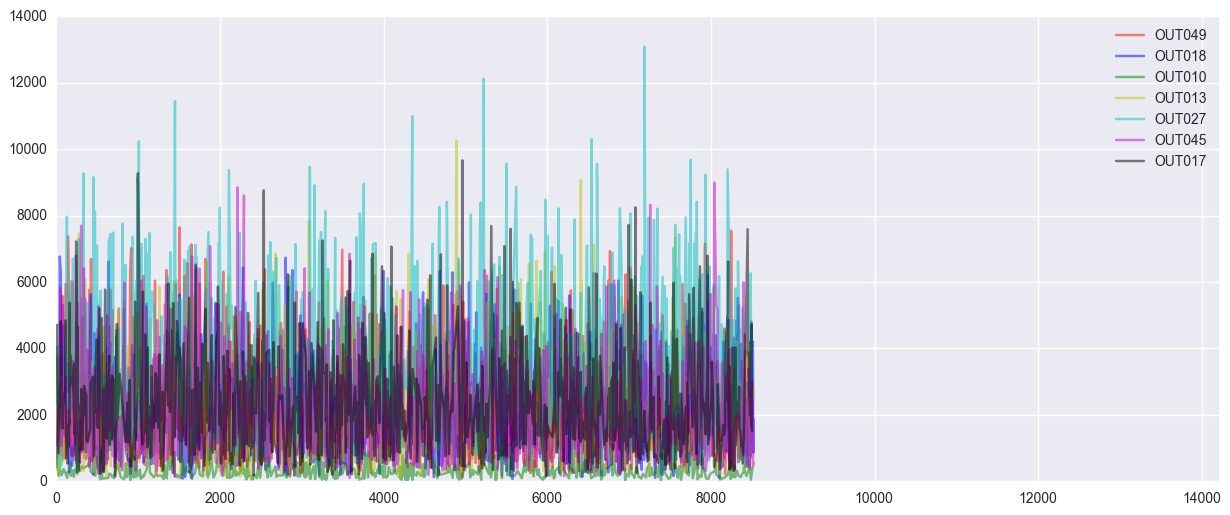

In [15]:
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k']

for i, s in enumerate(data.Outlet_Identifier.unique()[:7]):
    data[data.Outlet_Identifier == s].Item_Outlet_Sales.plot(c=colors[i], figsize=(15, 6), label=s, alpha=.5)

plt.legend(loc='best');

# Stores have varying sales

In [16]:
data.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [17]:
data_OUT049 = data[data.Outlet_Identifier == 'OUT049']
data_OUT018 = data[data.Outlet_Identifier == 'OUT018']
data_OUT010 = data[data.Outlet_Identifier == 'OUT010']
data_OUT013 = data[data.Outlet_Identifier == 'OUT013']
data_OUT027 = data[data.Outlet_Identifier == 'OUT027']
data_OUT045 = data[data.Outlet_Identifier == 'OUT045']
data_OUT017 = data[data.Outlet_Identifier == 'OUT017']
data_OUT035 = data[data.Outlet_Identifier == 'OUT035']
data_OUT019 = data[data.Outlet_Identifier == 'OUT019']
data_OUT046 = data[data.Outlet_Identifier == 'OUT046']

# Correlation between item type and sales for a particular store

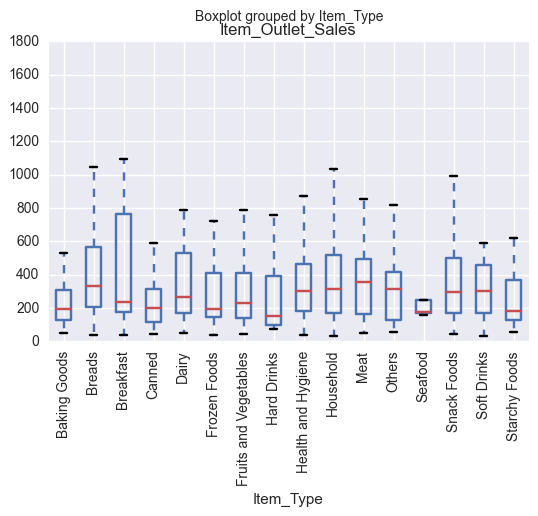

In [18]:
data_OUT010.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

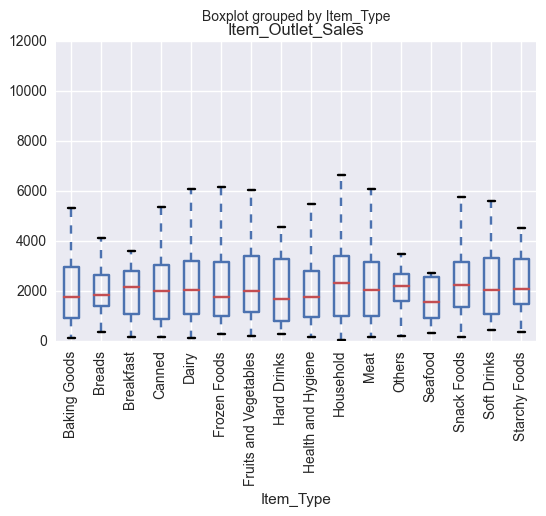

In [19]:
data_OUT013.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

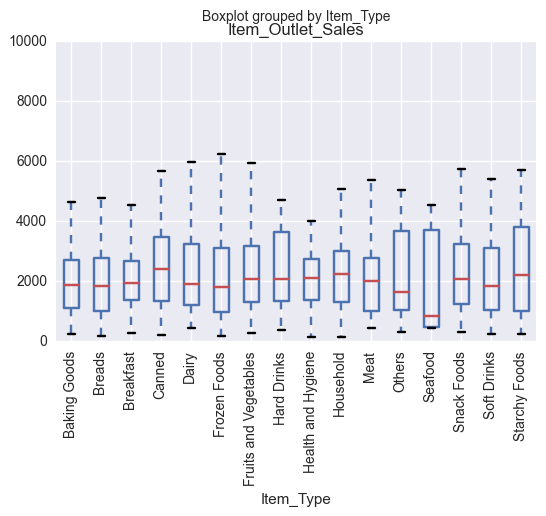

In [20]:
data_OUT017.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

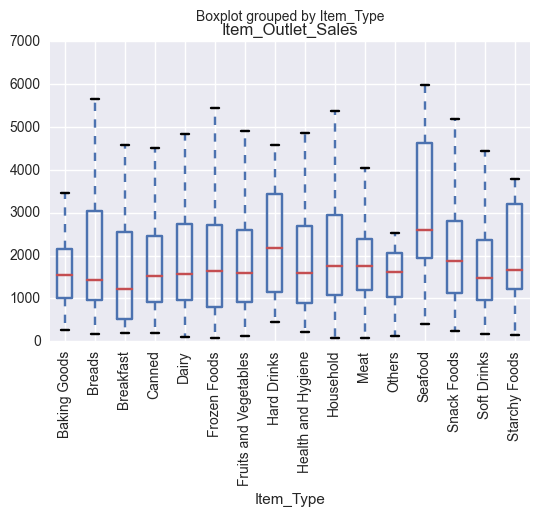

In [21]:
data_OUT018.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

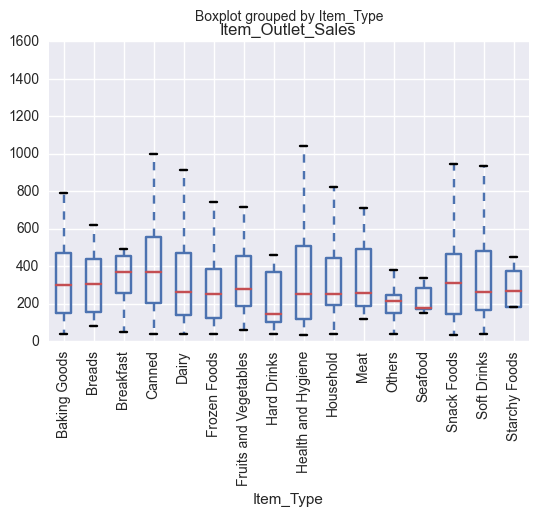

In [22]:
data_OUT019.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

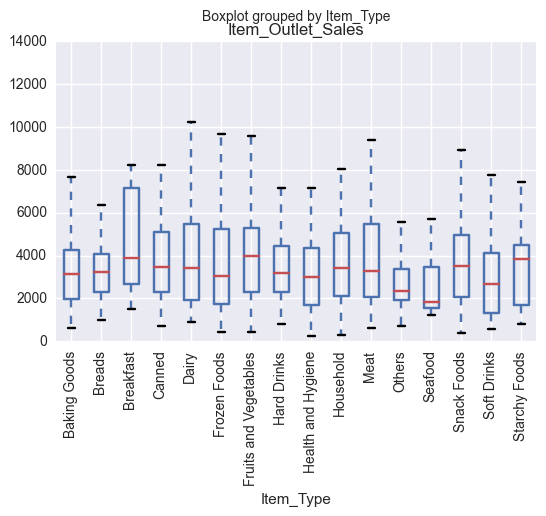

In [23]:
data_OUT027.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

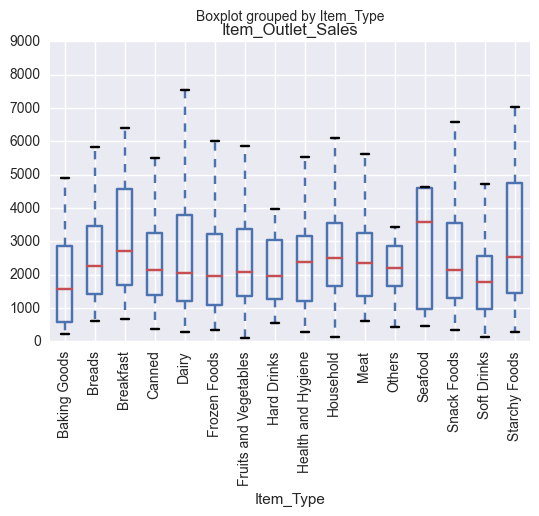

In [24]:
data_OUT035.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

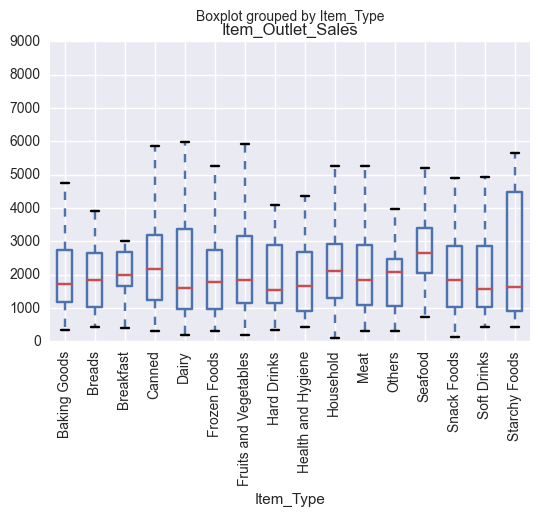

In [25]:
data_OUT045.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

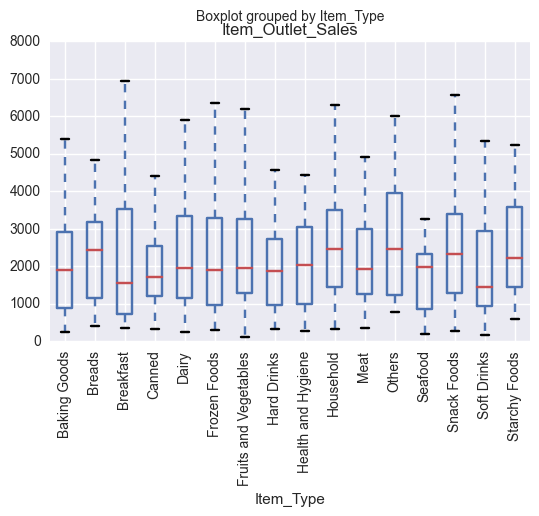

In [26]:
data_OUT049.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

# Analysis of item visibility with item outlet sales

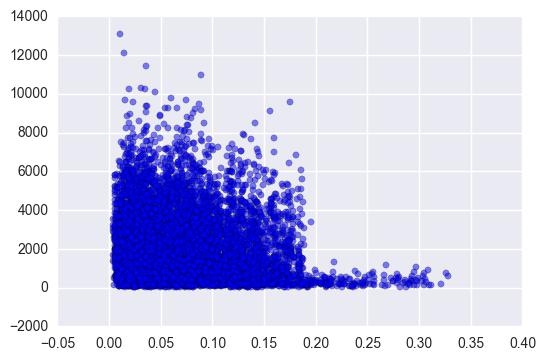

In [27]:
plt.scatter(data.Item_Visibility, data.Item_Outlet_Sales, alpha=.5);

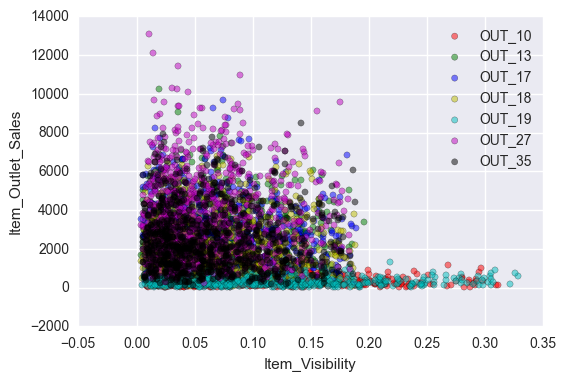

In [28]:
ax = data_OUT010.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='r', alpha=0.5, label='OUT_10')
data_OUT013.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='g', ax=ax, alpha=0.5, label='OUT_13')
data_OUT017.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='b', ax=ax, alpha=0.5, label='OUT_17')
data_OUT018.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='y', ax=ax, alpha=0.5, label='OUT_18')
data_OUT019.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='c', ax=ax, alpha=0.5, label='OUT_19')
data_OUT027.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='m', ax=ax, alpha=0.5, label='OUT_27')
data_OUT035.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='k', ax=ax, alpha=0.5, label='OUT_35')
plt.legend(loc='best');

# Correlation between item prices and sales

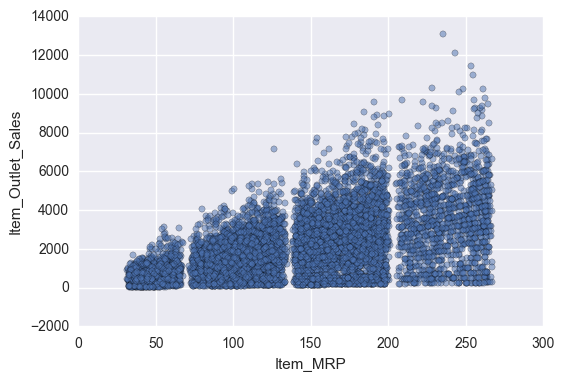

In [29]:
data.plot(kind='scatter', x = 'Item_MRP', y = 'Item_Outlet_Sales', alpha=.5);

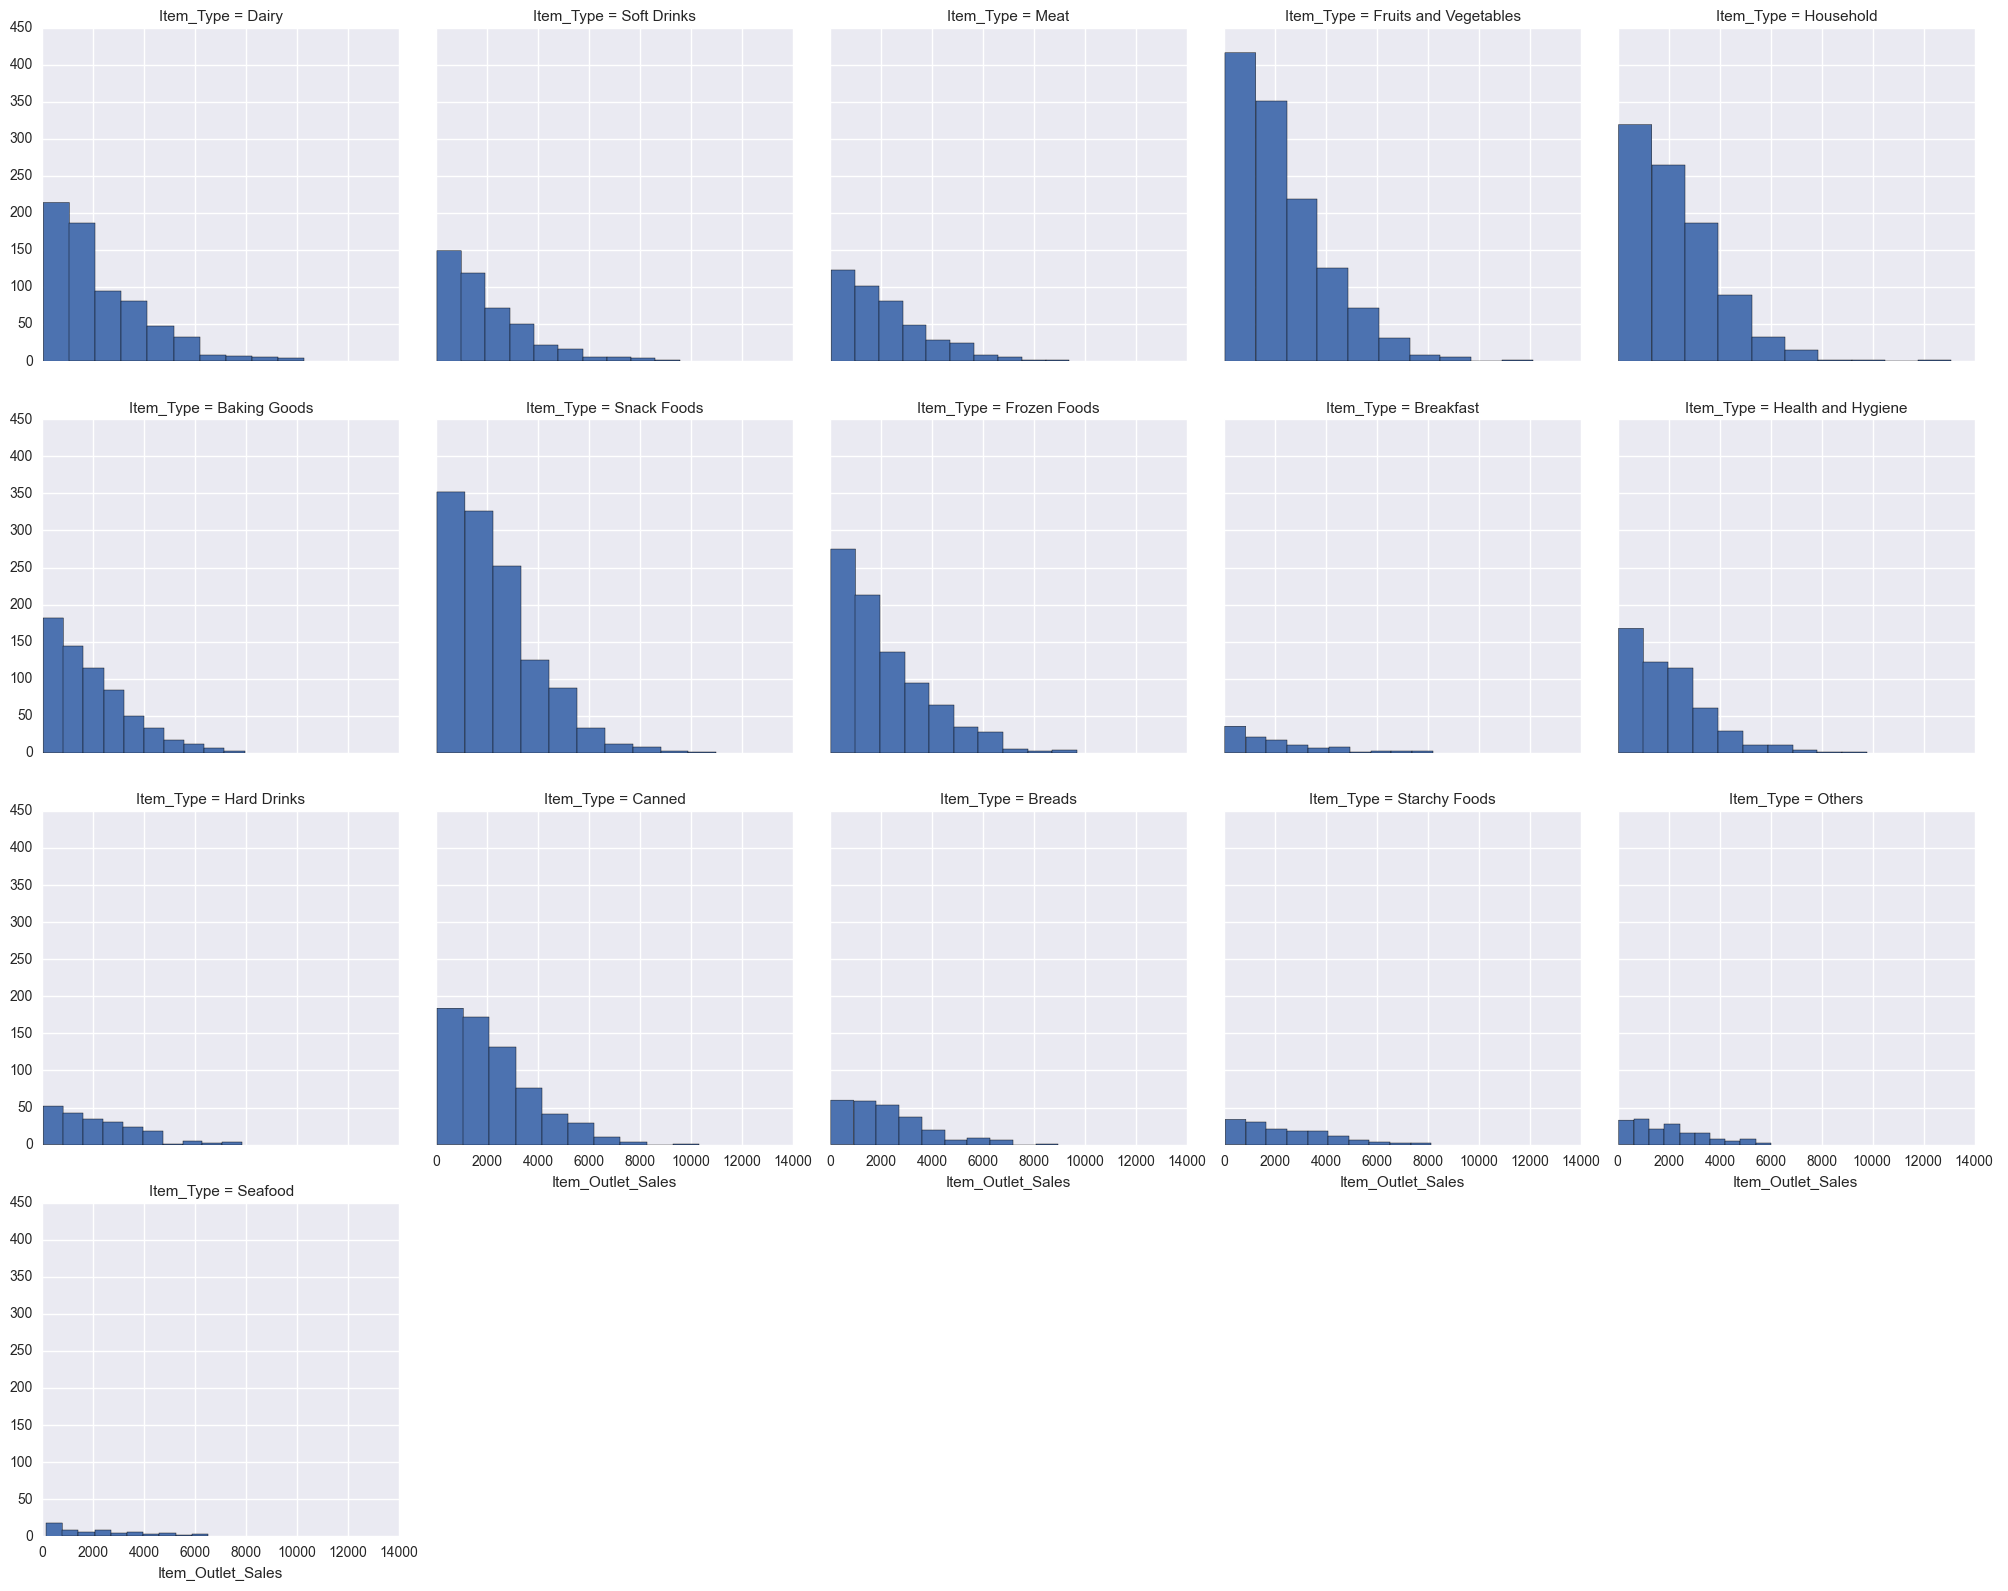

In [30]:
sns.FacetGrid(data, col='Item_Type', size=4, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

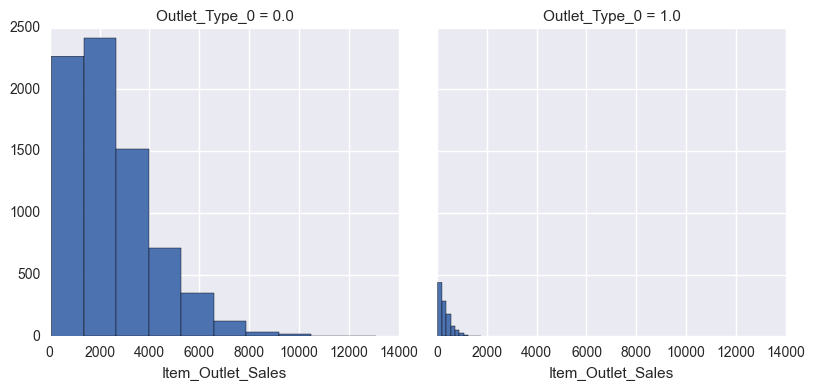

In [31]:
sns.FacetGrid(data, col='Outlet_Type_0', size=4) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

In [ ]:
Numerical:
    
    1-column:
         histgram, density plot, gaussion plot
            
            multivariate analysis: Scatter, Histogram


Categorical:
    1- Bar,Factor plot, Pie chart,
    

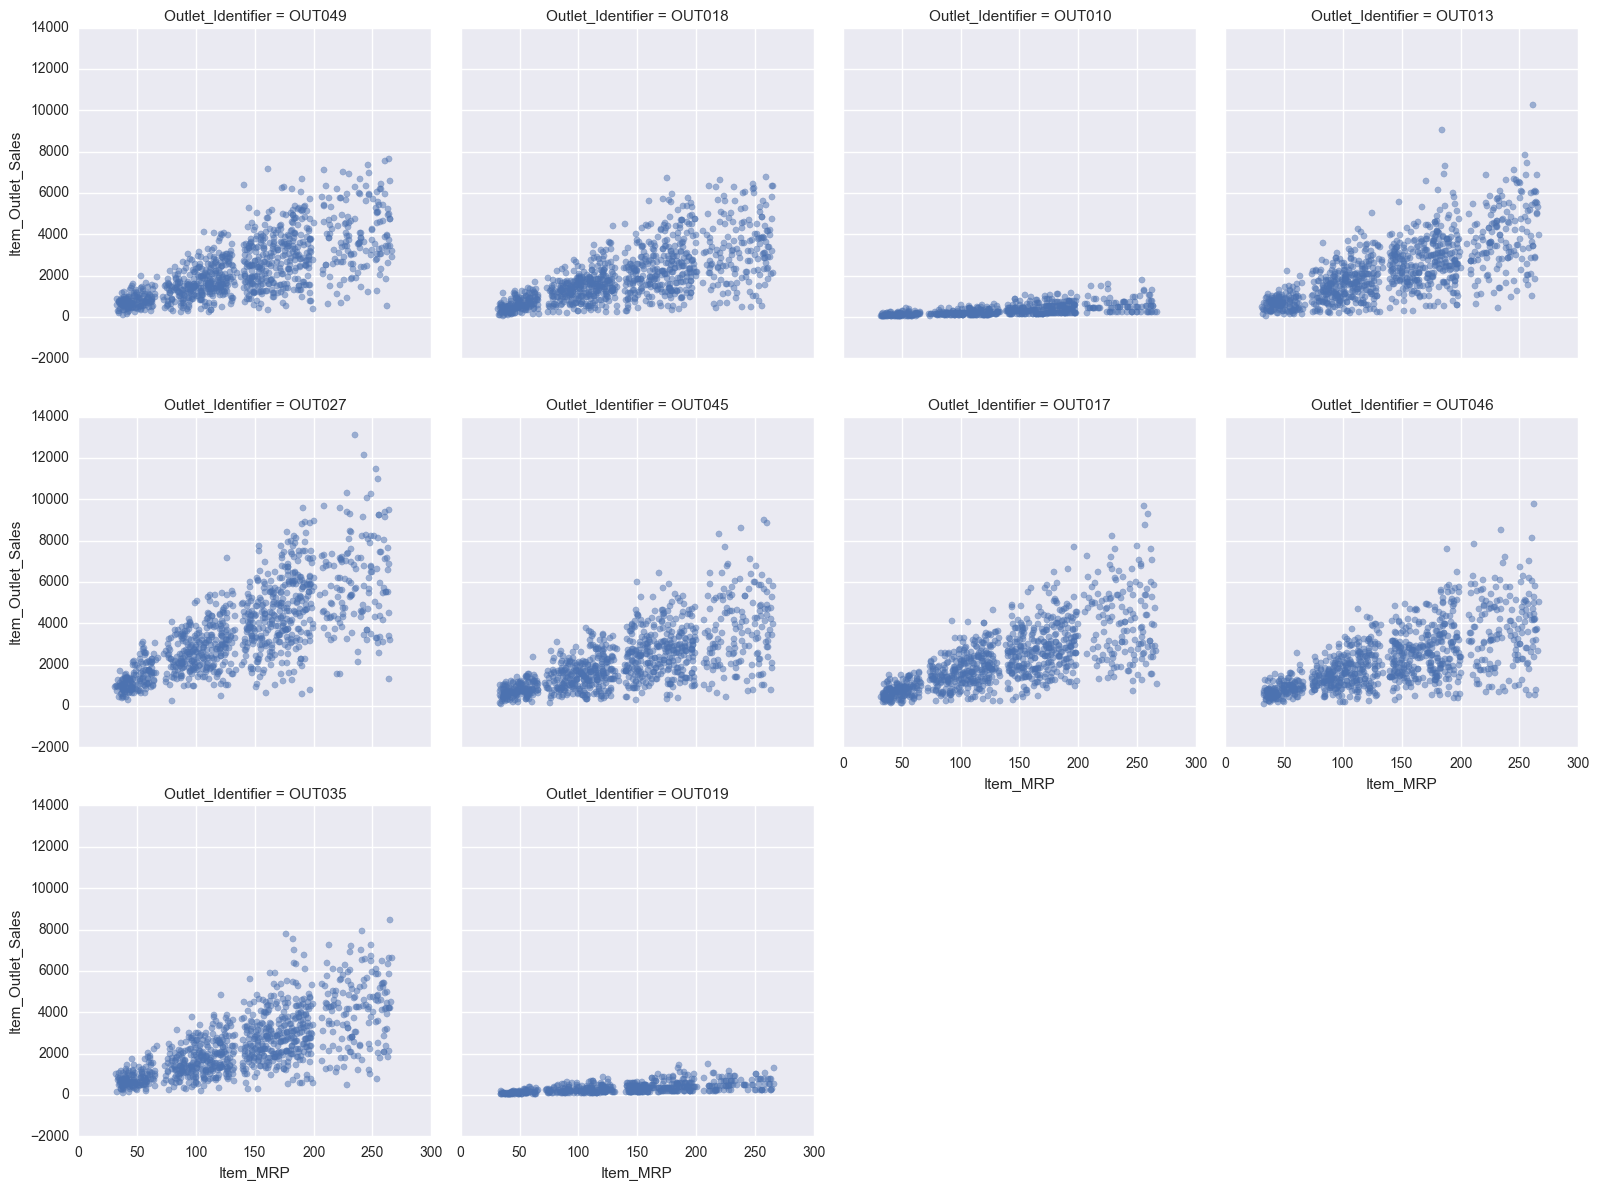

In [32]:
sns.FacetGrid(data, col='Outlet_Identifier', col_wrap=4, size=4) \
    .map(plt.scatter, 'Item_MRP', 'Item_Outlet_Sales', c='b', alpha=0.5) \
    .add_legend();

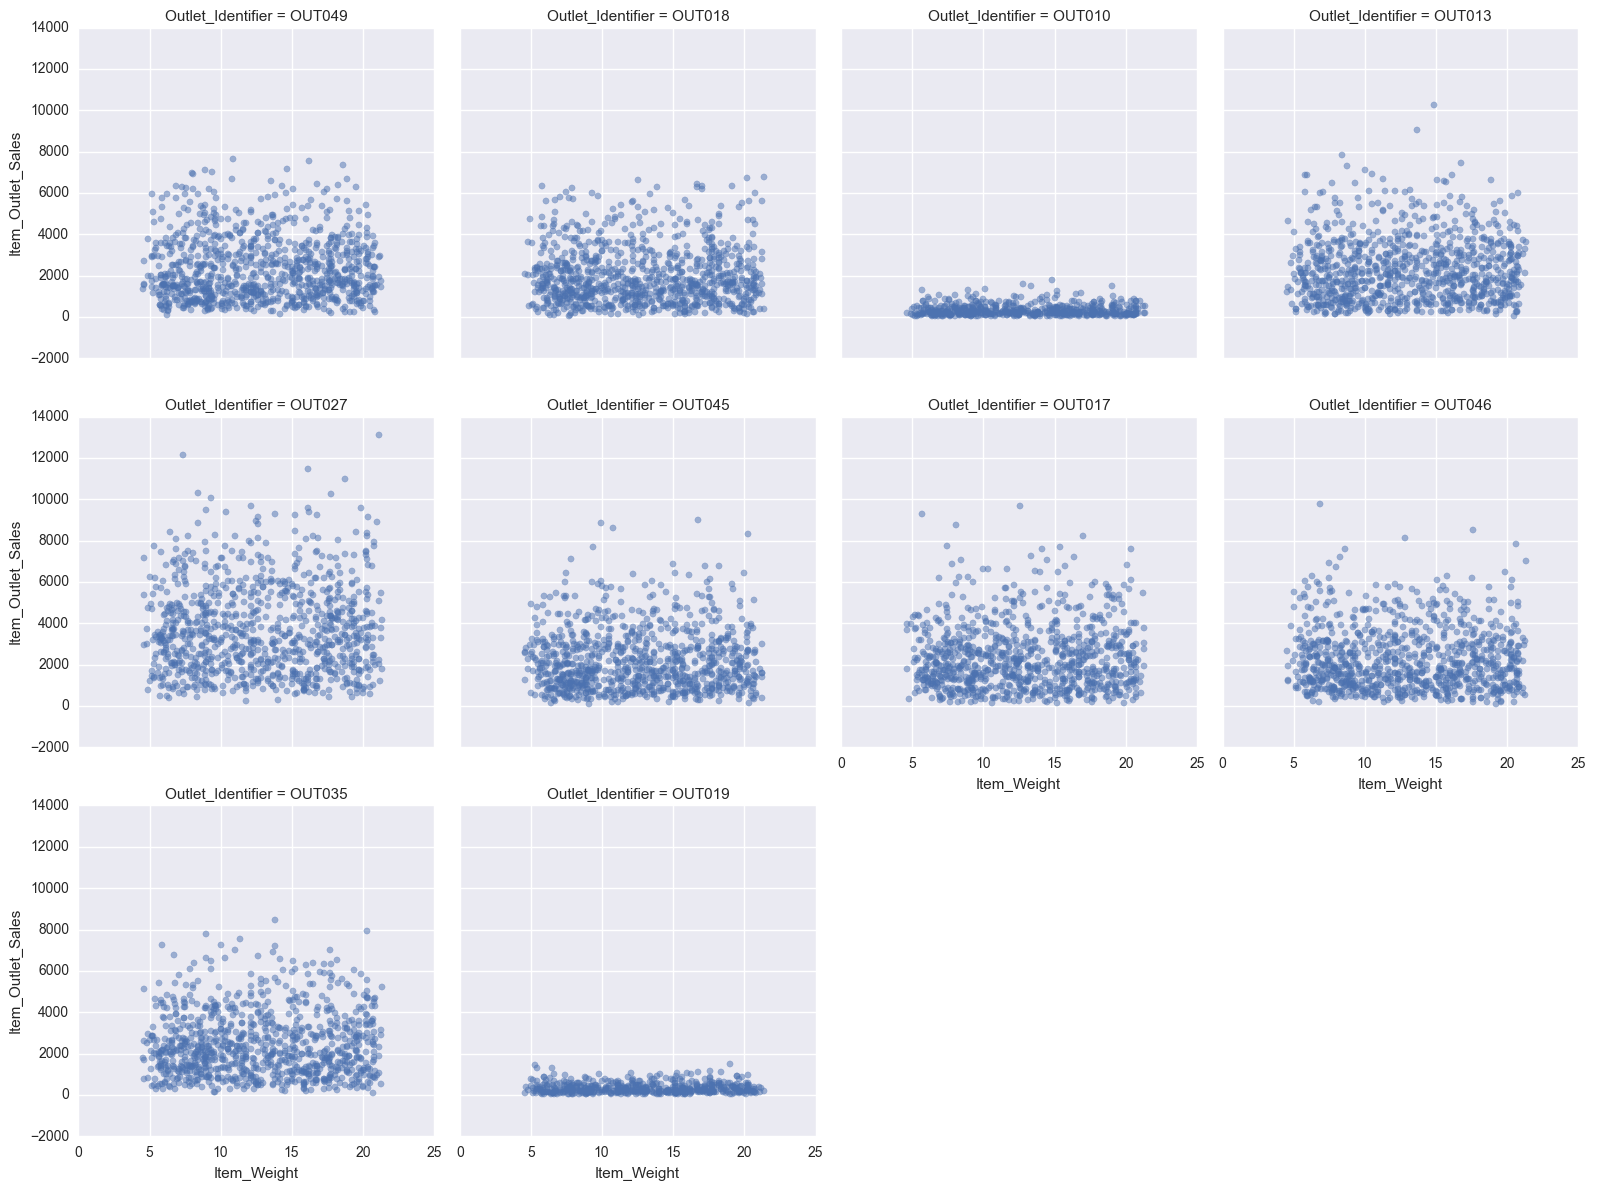

In [33]:
sns.FacetGrid(data, col='Outlet_Identifier', col_wrap=4, size=4) \
    .map(plt.scatter, 'Item_Weight', 'Item_Outlet_Sales', c='b', alpha=0.5) \
    .add_legend();

In [34]:
#drop the columns whose data types are converted.  Item type which is of
#16 categories has been reduced to 3 categories and instead of the establishment year
#we consider age of the stores for the analysis.

data = data.drop('Item_Type' , axis = 1)

In [35]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_Visibility_MeanRatio,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,1999,OUT049,train,0.931078,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,2009,OUT018,train,0.933420,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,1999,OUT049,train,0.960069,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,1998,OUT010,train,1.000000,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,1987,OUT013,train,1.000000,26,...,0,1,0,0,0,0,0,0,0,0


In [36]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_Visibility_MeanRatio,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,1999,OUT049,train,0.931078,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,2009,OUT018,train,0.933420,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,1999,OUT049,train,0.960069,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,1998,OUT010,train,1.000000,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,1987,OUT013,train,1.000000,26,...,0,1,0,0,0,0,0,0,0,0


In [37]:
#Divide the data set back to train and test 
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']
train.head
#Drop unnecessary columns
test.drop(['source','Item_Outlet_Sales'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)


In [38]:
#Creating a baseline model
mean_sales=train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission
base1=test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales']=mean_sales


In [39]:
base1['Item_Outlet_Sales']=base1['Outlet_Identifier'].apply(lambda x: train.loc[train['Outlet_Identifier']==x]
                                                            ['Item_Outlet_Sales'].mean())



In [ ]:
y = ax+ b


In [40]:
#function to create submission file
#define target and ID Columns for submission
target = 'Item_Outlet_Sales'
IDCol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics

In [41]:
# Linear Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor
%matplotlib inline

predictors = [x for x in train.columns if x not in [target]+IDCol]
#print predictors
alg1= LinearRegression(normalize=True)

In [42]:
#fit the algorithm on the data
alg1.fit(train[predictors],train[target])

LinearRegression(copy_X=True, fit_intercept=True, normalize=True)

In [43]:
#predict training data set
train_predictions = alg1.predict(train[predictors])

In [44]:
#performs cross validation
cv_score = cross_validation.cross_val_score(alg1,train[predictors],train[target],cv=20,scoring='mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))

In [45]:
#Print model report
print "\nModel Report :"
print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,train_predictions))
print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))


Model Report :
RMSE : 1127
CV Score : Mean - 1132 | Std - 45.02 | Min - 1075 | Max - 1209


In [46]:
#Predict on testing data
test[target]=alg1.predict(test[predictors])

In [47]:
#Ridge Regression
predictors = [x for x in train.columns if x not in [target]+IDCol]
alg2=Ridge(alpha=0.05,normalize=True)

#fit the algorithm on the data
alg2.fit(train[predictors],train[target])



Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, solver='auto', tol=0.001)

In [48]:
#predict training data set
train_predictions = alg2.predict(train[predictors])

#Predict on testing data
test[target]=alg2.predict(test[predictors])

In [49]:
#performs cross validation
cv_score = cross_validation.cross_val_score(alg2,train[predictors],train[target],cv=20,scoring='mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
#Print model report
print "\nModel Report :"
print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,train_predictions))
print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))



Model Report :
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.63 | Min - 1076 | Max - 1217


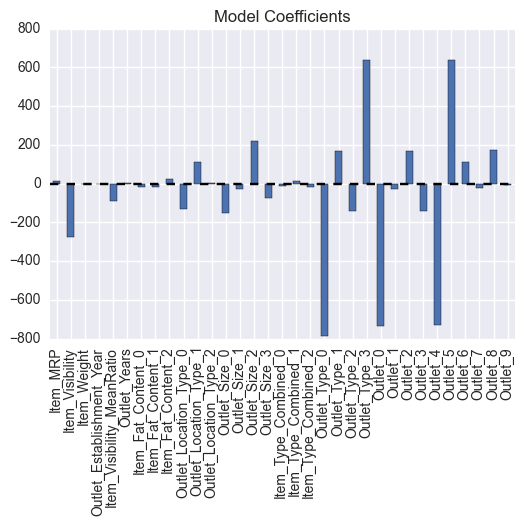

In [50]:
coef2 = pd.Series(alg2.coef_,predictors)
coef2.plot(kind='bar',title = 'Model Coefficients')

In [51]:

ada1=AdaBoostRegressor(base_estimator=alg1,learning_rate=0.9)
#fit the algorithm on the data
ada1.fit(train[predictors],train[target])


AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, normalize=True),
         learning_rate=0.9, loss='linear', n_estimators=50,
         random_state=None)

In [52]:
#predict training data set
train_predictions = ada1.predict(train[predictors])

#Predict on testing data
test[target]=ada1.predict(test[predictors])

In [53]:
cv_score = cross_validation.cross_val_score(ada1,train[predictors],train[target],cv=20,scoring='mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
#Print model report
print "\nModel Report :"
print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,train_predictions))
print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))


Model Report :
RMSE : 1127
CV Score : Mean - 1157 | Std - 40.8 | Min - 1076 | Max - 1224


In [54]:
#DecisionTree Model
from sklearn.tree import DecisionTreeRegressor
predictors=[x for x in train.columns if x not in [target]+IDCol]
alg3=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
ada2=AdaBoostRegressor(base_estimator=alg3)#,learning_rate=0.9)


ada2.fit(train[predictors],train[target])

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(compute_importances=None, criterion='mse', max_depth=15,
           max_features=None, max_leaf_nodes=None, min_density=None,
           min_samples_leaf=100, min_samples_split=2, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [55]:
alg3=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
alg3.fit(train[predictors],train[target])

DecisionTreeRegressor(compute_importances=None, criterion='mse', max_depth=15,
           max_features=None, max_leaf_nodes=None, min_density=None,
           min_samples_leaf=100, min_samples_split=2, random_state=None,
           splitter='best')

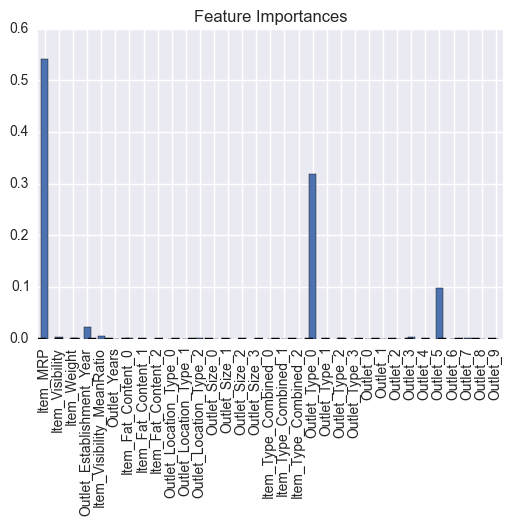

In [56]:
coef5=pd.Series(alg3.feature_importances_,predictors)
coef5.plot(kind='bar',title='Feature Importances')

In [57]:
cv_score = cross_validation.cross_val_score(ada2,train[predictors],train[target],cv=20,scoring='mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
#Print model report
print "\nModel Report :"
print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,train_predictions))
print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))


Model Report :
RMSE : 1127
CV Score : Mean - 1250 | Std - 39.42 | Min - 1180 | Max - 1340



Model Report :
RMSE : 1127
CV Score : Mean - 1250 | Std - 39.42 | Min - 1180 | Max - 1340


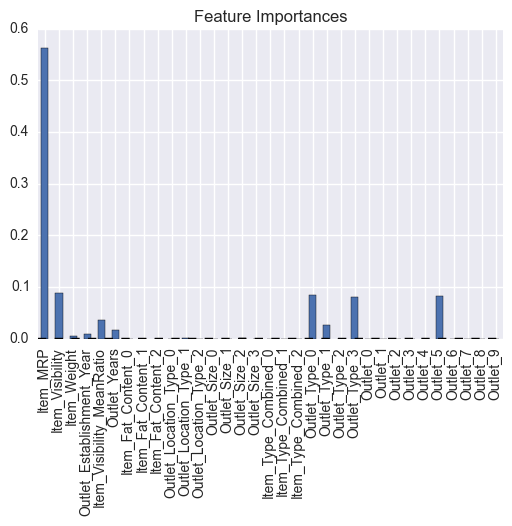

In [58]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
predictors=[x for x in train.columns if x not in [target]+IDCol]
alg5=RandomForestRegressor(n_estimators=200,max_depth=3,min_samples_leaf=300,n_jobs=4)
ada2=AdaBoostRegressor(base_estimator=alg5)#,learning_rate=0.9)
#fit the algorithm on the data
ada2.fit(train[predictors],train[target])
coef5=pd.Series(ada2.feature_importances_,predictors)
coef5.plot(kind='bar',title='Feature Importances')
#Print model report
print "\nModel Report :"
print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,train_predictions))
print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
  


Model Report :
RMSE : 1127
CV Score : Mean - 1250 | Std - 39.42 | Min - 1180 | Max - 1340


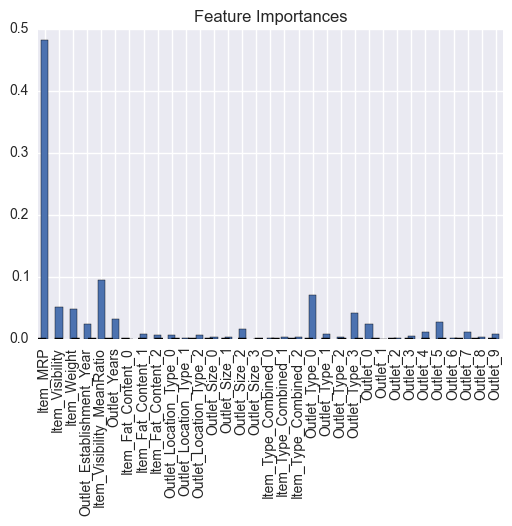

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

predictors=[x for x in train.columns if x not in [target]+IDCol]
alg1= LinearRegression(normalize=True)
alg7=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,random_state=10,
                              n_estimators=70,min_samples_split=1000,min_samples_leaf=50,
                               max_leaf_nodes=7,max_features='sqrt')#,init=alg1)#loss='huber'
alg7.fit(train[predictors],train[target])
# param_test1 = {'n_estimators':range(20,81,10)}
# gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
# param_grid = param_test1, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
# gsearch1.fit(train[predictors],train[target])

coef5=pd.Series(alg7.feature_importances_,predictors)
coef5.plot(kind='bar',title='Feature Importances')
#Print model report
print "\nModel Report :"
print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,train_predictions))
print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
  

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=70, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_
#Print model report
print "\nModel Report :"
print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,train_predictions))
print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=70,max_depth=5,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

param_test4 = {'max_features':range(2,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=70,max_depth=5, min_samples_split=1000, min_samples_leaf=50, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
 7+ Models === the less rmse we be chosen for depoyment

In [136]:
#Export submission file
filename= "Submission.csv"
IDCol.append(target)
submission = pd.DataFrame({x : test[x] for x in IDCol})
submission.to_csv("C:/Users/Jameel shaik/Downloads/Dezyre/HackerDay/Bigmartsales-iii/"+filename,index=False)